# Import Libraries



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import os


# load  the dataset


In [2]:
data=pd.read_csv("../input/customer-personality-analysis/marketing_campaign.csv", sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [6]:
data.isnull().sum()/data.shape[0] * 100
# 1% from income is null value

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

## filling the null values with mean..


In [7]:
data['Income']=data['Income'].fillna(data['Income'].mean())

In [8]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [9]:
data.duplicated().sum()

0

**No Duplicated values**

____

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [11]:
#to know the last day..
data['Dt_Customer'].max()

'31-12-2013'

In [12]:
#make columns of age ..
data['age']=2023-data["Year_Birth"]

In [13]:
pd.set_option('display.max_columns', None)
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,56
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,52
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,38
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,49
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,73


<Axes: xlabel='age'>

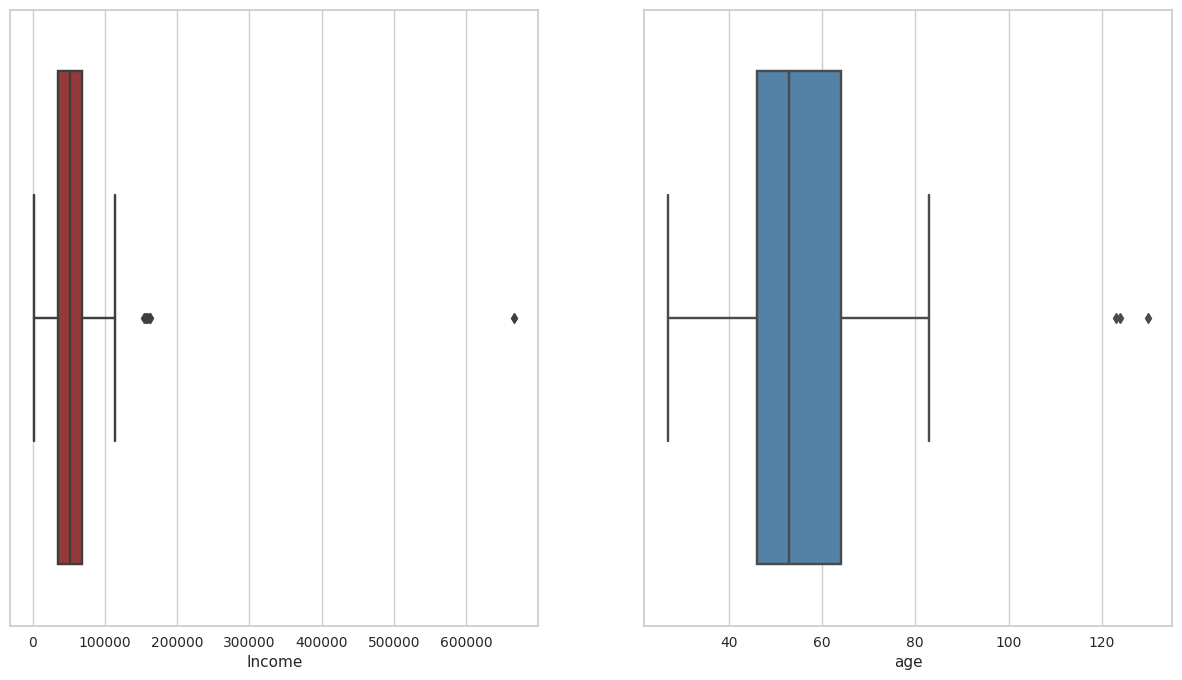

In [14]:
#checking the ouliers in age and income columns.
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.xlabel='income'
sns.boxplot(data=data,x='Income',color='brown')
plt.subplot(1,2,2)
plt.xlabel='age'
sns.boxplot(data=data,x='age',color='steelblue')


****so there is outliers****

In [15]:
#delete the outliers..
#from age column
data = data[data['age'] < 80]
#from income column
data=data[data['Income']<150000]

<Axes: xlabel='age'>

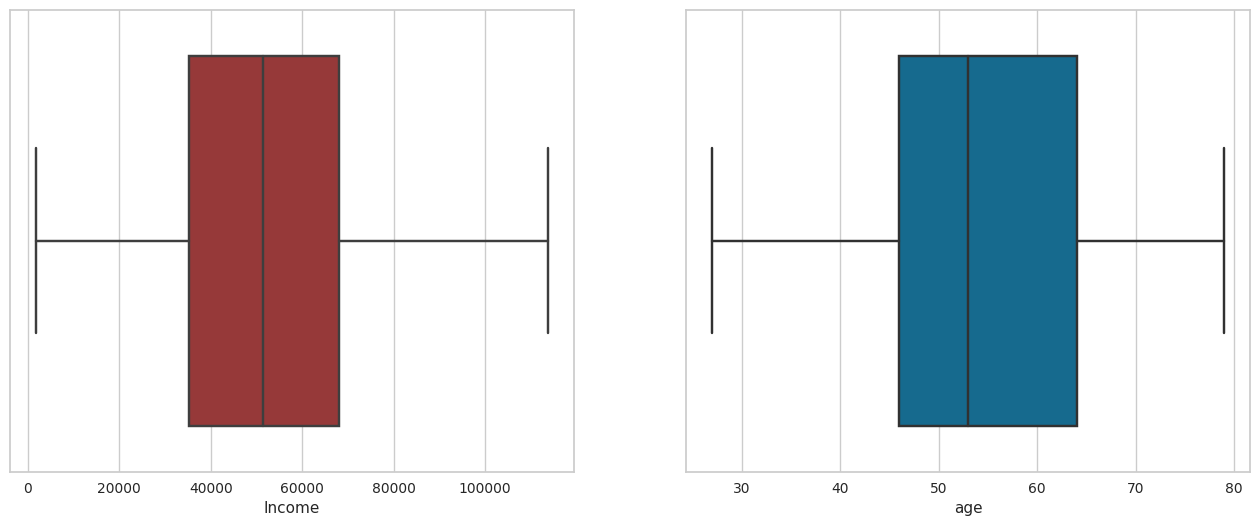

In [16]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.xlabel='income'
sns.boxplot(data=data,x='Income',color = "brown")
plt.subplot(1,2,2)
plt.xlabel='age'
sns.boxplot(data=data,x='age')

In [17]:
data['Marital_Status'].value_counts()

Marital_Status
Married     858
Together    575
Single      477
Divorced    228
Widow        75
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [18]:
#handling Marital_Status column
data['relationship']=data['Marital_Status'].replace({'Married':'in_relationship' , 'Together':'in_relationship' , 'Single':'single' , 'Divorced':'single',
                                                    'YOLO':'single' , 'Absurd':'single' , 'Widow':'single' ,'Alone':'single'})

In [19]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'age', 'relationship'],
      dtype='object')

In [20]:
data['members_home']=data['Kidhome']+data['Teenhome']+data['relationship'].replace({'single':0,'in_relationship':1})

In [21]:
data['AcceptedCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3']
+ data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    1
2238    0
2239    1
Length: 2220, dtype: int64

In [22]:
data['num_purchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']

In [23]:
data['expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] 
+ data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

0       348
1         9
2       174
3        18
4        88
       ... 
2235    407
2236      8
2237     68
2238    171
2239     24
Length: 2220, dtype: int64

In [24]:
#dropping unnecessary columns
data.drop(labels=['Marital_Status','ID','Year_Birth'
                  ,'Dt_Customer', 'Kidhome','Teenhome',
                  'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts',
                  'MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                'AcceptedCmp2','Z_CostContact', 'Z_Revenue',"Recency", "Complain"], axis=1, inplace=True)

In [25]:
data.columns

Index(['Education', 'Income', 'Response', 'age', 'relationship',
       'members_home', 'AcceptedCmp', 'num_purchases', 'expenses'],
      dtype='object')

<Axes: xlabel='Income', ylabel='Count'>

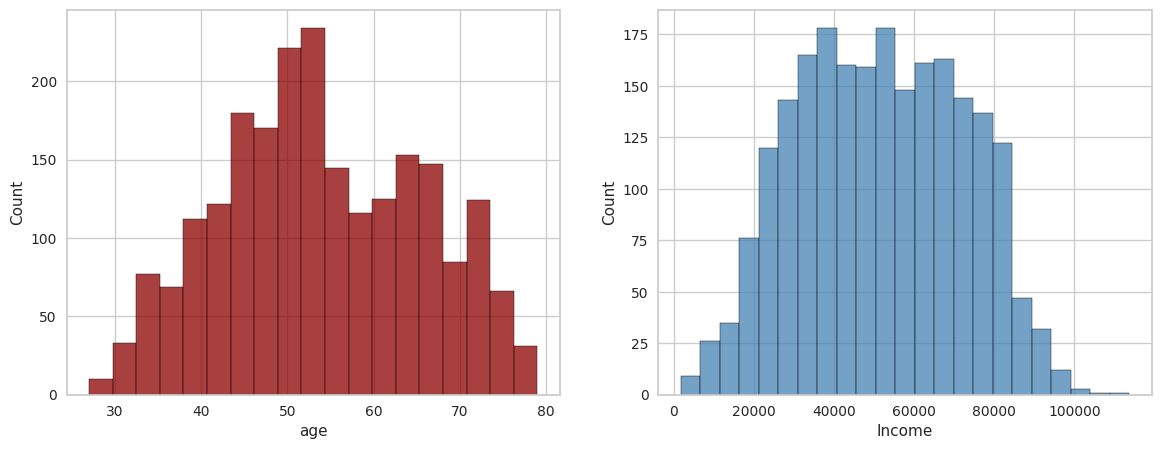

In [26]:
plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)
sns.histplot(data,x='age',color = "darkred")
plt.subplot(1,2,2)
sns.histplot(data,x='Income',color='steelblue')

<Axes: xlabel='relationship', ylabel='count'>

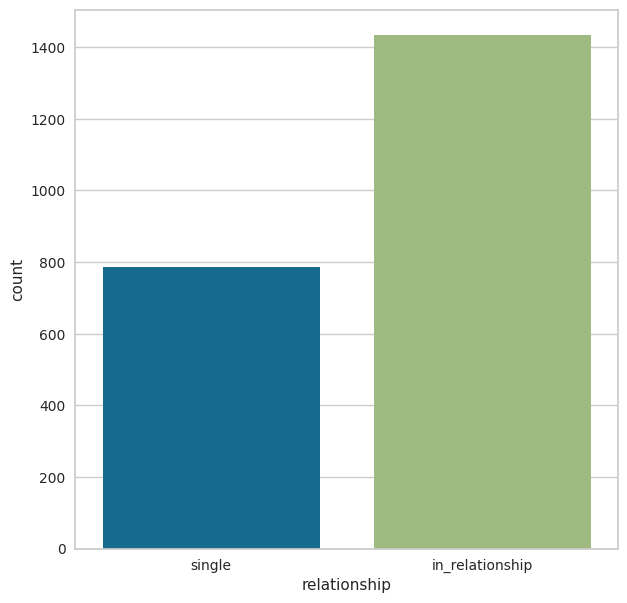

In [27]:
plt.figure(figsize=(7,7))
sns.countplot(data,x='relationship')

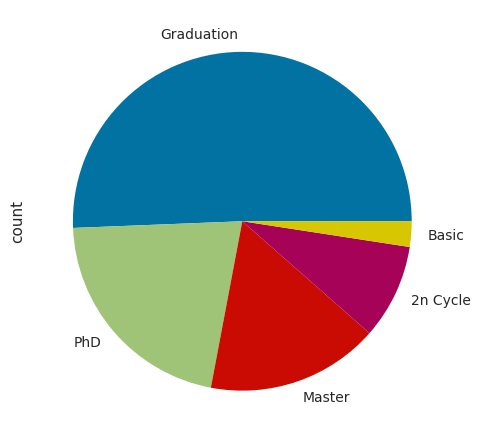

In [28]:
#parplot of eduction
plt.plot(figsize=(10,10))
data.Education.value_counts().plot(kind='pie')
plt.show()

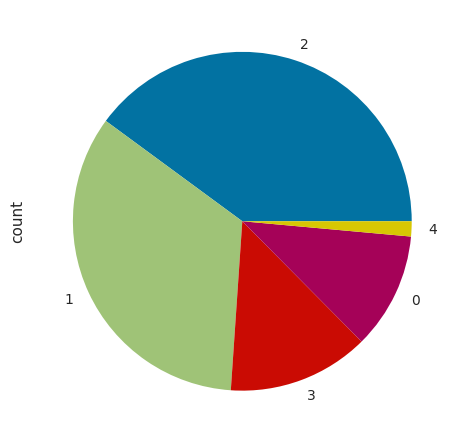

In [29]:
#numbers of members in family.
plt.plot(figsize=(10,10))
data.members_home.value_counts().plot(kind='pie')
plt.show()

In [30]:
data.columns

Index(['Education', 'Income', 'Response', 'age', 'relationship',
       'members_home', 'AcceptedCmp', 'num_purchases', 'expenses'],
      dtype='object')

# preprocess the data

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2220 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Education      2220 non-null   object 
 1   Income         2220 non-null   float64
 2   Response       2220 non-null   int64  
 3   age            2220 non-null   int64  
 4   relationship   2220 non-null   object 
 5   members_home   2220 non-null   int64  
 6   AcceptedCmp    2220 non-null   int64  
 7   num_purchases  2220 non-null   int64  
 8   expenses       2220 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 173.4+ KB


In [32]:
#convert education and relationship to num values..
data['Education']=  preprocessing.LabelEncoder().fit_transform(data['Education'])
data['relationship']=  preprocessing.LabelEncoder().fit_transform(data['relationship'])

In [33]:
#education after converting
data.head()

,Education,Income,Response,age,relationship,members_home,AcceptedCmp,num_purchases,expenses
0,2,58138.0,1,66,1,0,0,25,1269
1,2,46344.0,0,69,1,2,0,6,18
2,2,71613.0,0,58,0,1,0,21,602
3,2,26646.0,0,39,0,2,0,8,35
4,4,58293.0,0,42,0,2,0,19,334


In [34]:
scaler=StandardScaler()
scaled_features = scaler.fit_transform(data.values)


In [35]:
scaled_data = pd.DataFrame(scaled_features, index=data.index, columns=data.columns)

In [36]:
#reduce features of the data to 4 ..
pca = PCA(n_components=4)
data_pca = pca.fit_transform(scaled_data)

In [37]:
data_pca.shape
print(data_pca)


[[ 2.84117543  1.49726566 -0.64517025  0.53487673]
 [-1.22022369  0.453612   -1.18017997  0.69722946]
 [ 0.89319946 -0.69505003 -0.45737487 -0.91383289]
 ...
 [ 1.40979403  1.71750708 -1.02977314 -1.21040312]
 [ 0.88021802 -1.79544944 -0.65369458  0.06522962]
 [-0.29785262 -1.27341401  0.78008019  2.6777765 ]]


# clustering Time

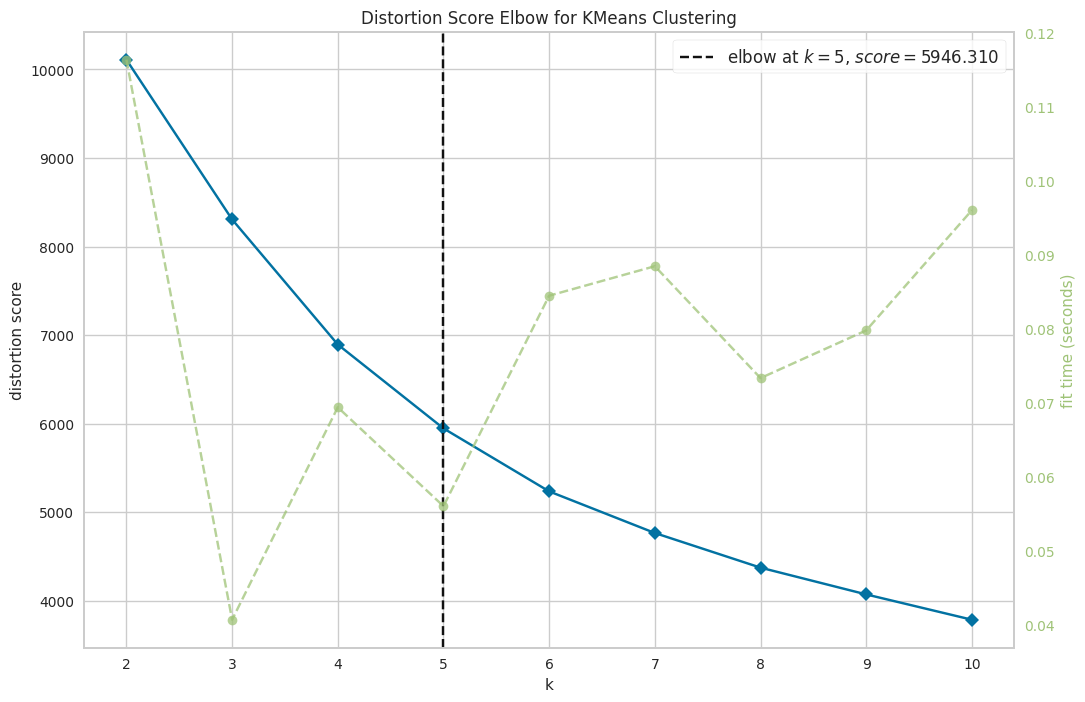

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
plt.figure(figsize=(12, 8))
elbow_graph = KElbowVisualizer(KMeans(random_state=123), k=10)
elbow_graph.fit(data_pca)
elbow_graph.show()

number of clusters is ***`5`*** 

In [39]:
kmeans = KMeans(n_clusters =5 )
cluster = kmeans.fit_predict(data_pca)
data['cluster']=cluster
cluster.min(),cluster.max()

(0, 4)

In [40]:
cluster

array([4, 2, 0, ..., 4, 0, 3], dtype=int32)

Text(0.5, 1.0, 'clusters in data')

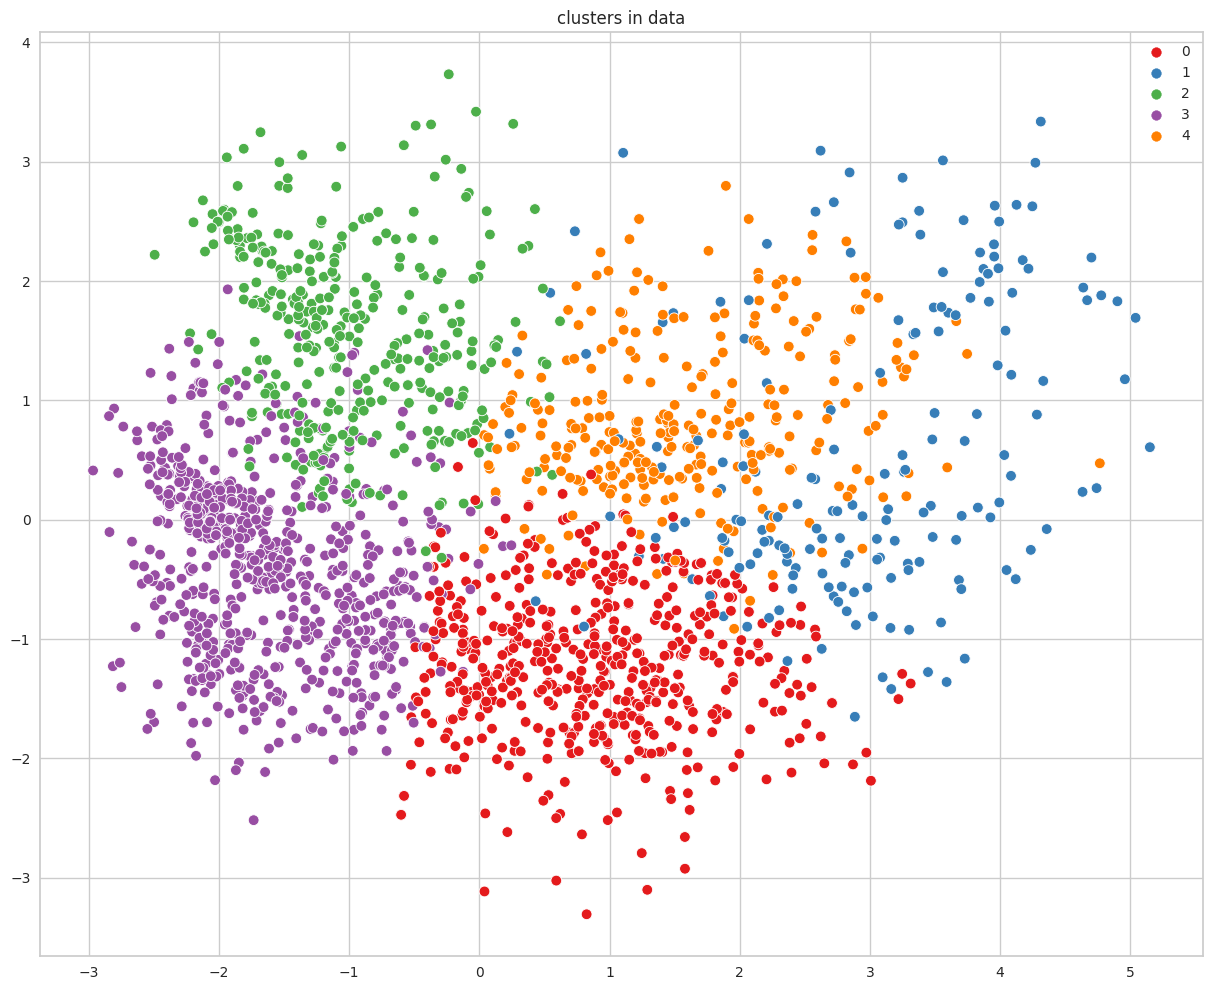

In [41]:
#ploting cluster...
plt.figure(figsize=(15,12))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=cluster,s=60, palette='Set1')
plt.title('clusters in data')

**make some plots and identify the spending `capabilities` and `income` for each cluster and comment them blow**

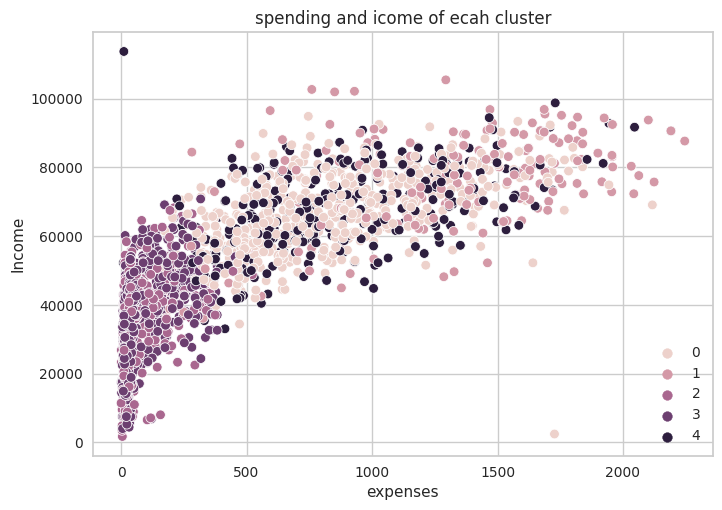

In [42]:
pl = sns.scatterplot(data = data, x=data["expenses"], y=data["Income"], hue=data["cluster"])
pl.set_title("spending and icome of ecah cluster")
plt.legend()
plt.show()

<Axes: xlabel='cluster', ylabel='count'>

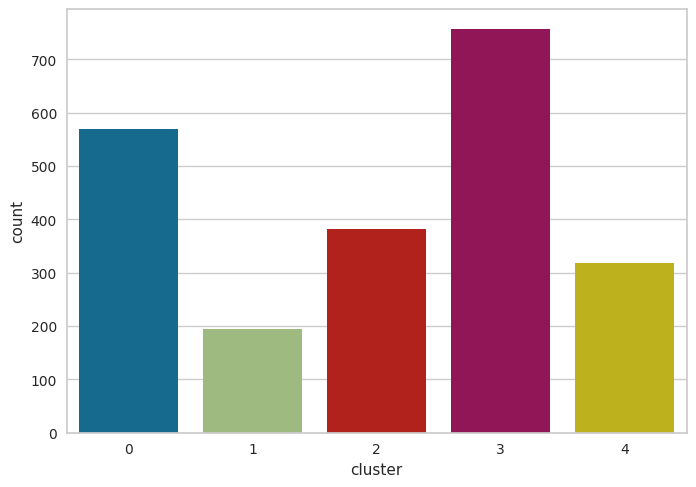

In [43]:
sns.countplot(x=data['cluster'])

<Axes: xlabel='cluster', ylabel='Income'>

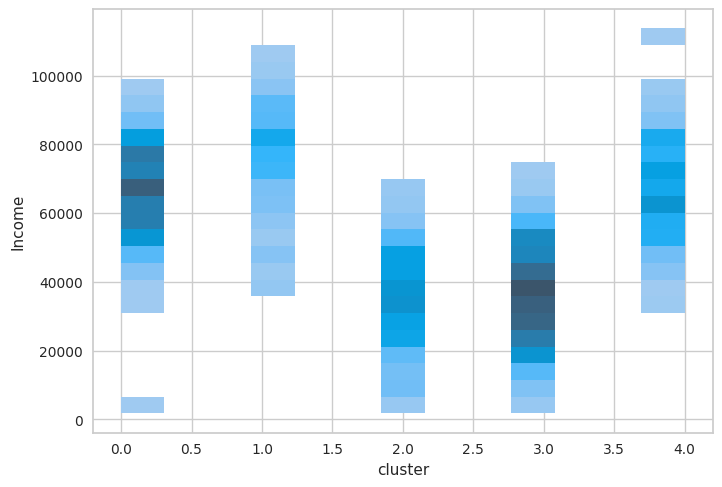

In [44]:
sns.histplot(x=data['cluster'],y=data['Income'])

<Axes: xlabel='cluster', ylabel='expenses'>

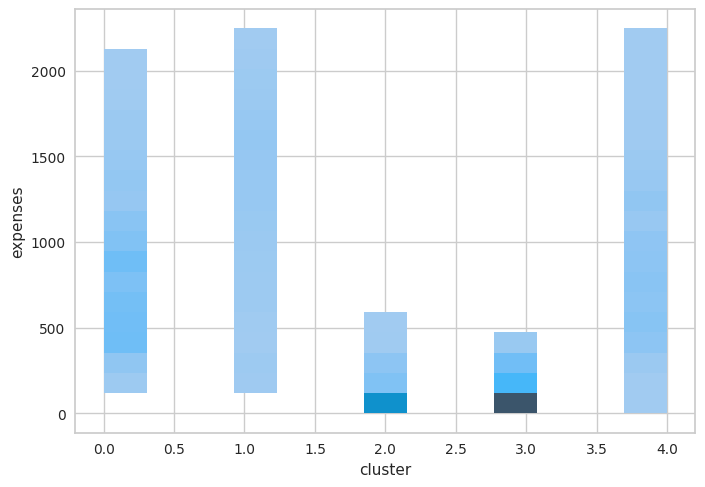

In [45]:
sns.histplot(x=data['cluster'],y=data['expenses'])